 <h1><b><i>Sentiment Analysis on Restaurant Reviews</i></b></h1>

TEXT 1: Provide a 1-2 paragraph **high level** overview of the purpose (what is going on AND why) of this Notebook, including the various steps as indicated by the following titles (some additional detail can be provided by subtitles within the notebook, but this description should remain 'high level'):
*   Exploratory Data Analysis
*   Model Training
*   Predictions
*   Overall Accuracy

This notebook aims to build and evaluate machine learning models for a sentiment analysis task. The process begins with Exploratory Data Analysis (EDA), where the dataset is inspected to understand its structure, check for missing values, and clean the data to prepare it for modeling. EDA helps to identify patterns, relationships, and potential issues in the dataset.

In the Model Training phase, various machine learning algorithms are trained on the preprocessed data. This step involves splitting the dataset into training and testing sets to train models like AdaBoost, Naive Bayes, and others. During the Predictions stage, the trained models are used to make predictions on the test set to evaluate their performance. Finally, Overall Accuracy is assessed by calculating accuracy and other metrics like precision, recall, and F1-score, which help determine the model’s effectiveness and generalization to unseen data. The overall goal is to select the best-performing model for sentiment classification.

NOTE: You may find this TEXT 1 easier to write AT THE END, after having completely run the Notebook and completed the rest of the assignment.

#  Importing the libraries

# Library Loading

In [1]:
# Importing essential Libraries

# NumPy is used for numerical computations and working with arrays.
import numpy as np

# Pandas is used for data manipulation and analysis.
import pandas as pd


# Exploratory Data Analysis (EDA)

<h2><b>Data Loading</b></h2>  Be sure you have uploaded the Restaurant_Reviews.csv data file to the Files area of Colab.

In [3]:
#The notebook introduces the topic 'Sentiment Analysis on Restaurant Reviews'."
# data loading
df = pd.read_csv(r'/content/Data-460_Assign_2-Restaurant_Reviews.csv')

<h2><b>Descriptive Data Analysis</b></h2>

In [4]:
# Displays the shape of the DataFrame
df.shape

(1000, 2)

In [5]:
# List all column names of the DataFrame
df.columns

Index(['Review', 'Liked'], dtype='object')

In [6]:
# Displays the first few rows of the DataFrame
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [7]:
# Shows the last five rows of the dataset
df.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [8]:
# Displays 5 randomly selected rows from the dataset
df.sample(5)

,Review,Liked
414,I can take a little bad service but the food s...,0
528,This was my first time and I can't wait until ...,1
872,All in all an excellent restaurant highlighted...,1
155,the staff is friendly and the joint is always ...,1
560,My salad had a bland vinegrette on the baby gr...,0


In [9]:
# Summarizes the dataset by displaying data types, non-null values, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [10]:
# Counts the occurrences of unique values in the 'Liked' column (target variable)
df['Liked'].value_counts()

,count
Liked,
1,500
0,500


In [11]:
#  summary statistics for the numerical columns
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [12]:
# Checks for missing values in the DataFrame and returns the count of null values per column
df.isnull().sum()

,0
Review,0
Liked,0


In [13]:
# checks for duplicate rows in the DataFrame df and returns the total number of duplicate rows.
df.duplicated().sum()

6

In [14]:
# Imports libraries for data visualization.
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2,specs=[[{'type':'xy'}, {'type':'domain'}]])

fig.add_trace(
    go.Bar(
        x=df['Liked'].value_counts().index,
        y= df['Liked'].value_counts().values,
         marker=dict(color=['#6B816C','#91B092']), showlegend=False,
           text=df['Liked'].value_counts().values, textposition='auto', textfont=dict(size=18)
        ),
    row=1,col=1
    )

fig.add_trace(
    go.Pie(
        labels=df['Liked'].value_counts().index,
        values=df['Liked'].value_counts().values,
         marker=dict(colors=['#6B816C','#91B092']), textfont=dict(size=18),
         pull=[0.01,0.01]
        ),
    row=1,col=2
    )





fig.update_layout(title='<b>Distribution of the target<b>',
                 title_font={'size':25},
                 paper_bgcolor='#E0E1CD',
                 plot_bgcolor='#E0E1CD',
                 showlegend=True)

fig.update_yaxes(showgrid=False)
fig.show()

TEXT 2: In 2-3 sentences, based on the results of the Descriptive Data Analysis, provide a description of the dataset, filling in context that you can gather from the data itself, since you have not been given a data dictionary or description of the dataset.  Include 'technical' aspects of the dataset: how many rows, columns, datatypes, etc.  What does the 'Distribution of the target' visualization tell you about the 'balance' of the data?

The results of the Descriptive Data Analysis, the dataset contains a certain number of rows and columns (e.g., 1000 rows and a few columns), with the target variable likely representing sentiment (e.g., "Liked"). The data consists of text reviews and corresponding labels, with the columns being of mixed data types such as strings for reviews and integers for sentiment labels. The "Distribution of the target" visualization shows the balance of the target variable, indicating whether the dataset is balanced or imbalanced in terms of positive and negative reviews. If the target classes are relatively equal, the dataset is balanced, otherwise, it may require techniques to handle imbalance.

# **Feature Engineering**


In [15]:
df['Length'] = df['Review'].apply(len)
df.head(5)

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


TEXT 3: What has been accomplished in the previous
cell and why?

In this cell, a new column called 'Length' has been created in the DataFrame df, where the length of each review (number of characters) is calculated and stored. This is done using the apply(len) function, which applies the len() function to each entry in the 'Review' column to count the characters.

The purpose of this operation is likely to gain insights into the length of each review, which could be useful for further analysis such as identifying correlations between review length and sentiment, or for feature engineering in a machine learning model. The second line (df.head(5)) shows the first five rows of the updated DataFrame, displaying the reviews, their sentiment label (Liked), and the newly calculated Length.

# **Data Preprocessing**


<h2><b>Importing essential NLP libraries</b></h2>

In [40]:
# Comment 1: <Stopwords are common words in a language (such as "is," "and," "the," etc.) that do not contribute much meaning to the overall content or context of a text"\
              #In Natural Language Processing (NLP), these words are often filtered out during\
              #preprocessing to reduce noise and focus on more meaningful words that contribute to understanding or modeling text.
import nltk
import re

# Download NLTK stopwords data
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
print(list(stopwords.words('english')))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [18]:
stop_words = set(stopwords.words('english'))
stop_words.remove('not')
'not' in stop_words

False

TEXT 3: In the previous cell, we searched for the word 'not' in stopwords and removed it, if it was in the list.  The final line of code, *'not' in stop_words*, returns as 'False', which is a confirmation that 'not' isn’t (or is no longer) in the list.    

Consider your response to Comment 1, what are stopwords and why are they used in NLP?  

**Why might it be important to remove 'not' from the stopwords list?  HINT: have a look at the code and output in the next cell.**

Stopwords are common words in a language, such as "the," "is," and "and," that are often removed in Natural Language Processing (NLP) because they don't contribute much to the meaning of a sentence and can introduce noise. By eliminating these words, the focus is shifted to more meaningful terms that carry significant weight in the analysis.

However, in certain contexts, such as sentiment analysis, removing the word "not" from the stopwords list might lead to misinterpreting the sentiment. For example, "not good" and "good" would be treated similarly if "not" were removed, which could distort the meaning of the review. Keeping "not" ensures that negations are considered, preserving the original sentiment conveyed by phrases like "not bad" or "not happy." This is why it is important to manually remove "not" from the list of stopwords when working on tasks that rely on negation for sentiment understanding.

In [19]:
print('Original :',df.Review.iloc[1])
print('processed with not removing negation :',' '.join([word for word in df.Review.iloc[1].split() if word not in stop_words]))

Original : Crust is not good.
processed with not removing negation : Crust not good.


In [42]:
# Cleaning the Reviews and Creating a Corpus
# This cell is the perfect example of how several important ML tasks can be included in a single cell and run in 1.7 seconds with a single click.
# It's important to know what our code does in each cell, each line.

# Comment 2: <Cleaning the reviews transforms raw text into a structured format by removing\
              #unnecessary elements like punctuation, numbers, and non-alphabetic characters,\
              #helping models focus on meaningful content and reducing noise>

# Comment 3: <The line corpus = [] initializes an empty list called corpus. Its purpose is to\
              #store the cleaned and processed reviews, which will later be used for training or\
              #analyzing the machine learning model.>

corpus = []

# Loop through the first 1000 reviews (adjust the range as needed) in the DataFrame 'df'.
for i in range(0, 1000):

    # Comment 4: Step 1: <It removes non-alphabetic characters like numbers, punctuation, and special symbols from the review.?\
                           #This step ensures the review contains only meaningful words, which are more relevant for text analysis, while eliminating noise.>
    review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['Review'][i])

    # Comment 5: Step 2: <It transforms the entire text to lowercase\
                         #This ensures uniformity by treating words like "Good" and "good" as the same, avoiding case-sensitive discrepancies and improving consistency in text analysis.>
    review = review.lower()

    # Comment 6: Step 3: Tokenization, <It breaks the review into a list of words (tokens) by splitting the string at spaces\
                #Tokenization is essential for text processing, as it enables analysis of individual words rather than the entire text as a single block, making it easier to manipulate and process the text for further tasks.>
    review_words = review.split()

    # Comment 7: Step 4: Removing Stop Words, <It creates a new list of words by filtering out any word that is present in the predefined list of stop words (e.g., "the," "is," "and").\
                  #Stop words are typically removed in text processing because they are common words that do not add significant meaning and can introduce noise into the analysis. Removing them allows the model to focus on more relevant words.>
    review_words = [word for word in review_words if word not in stop_words]

    # Comment 8: Step 5: Stemming, <This code initializes a PorterStemmer object (ps) and then applies stemming to each word in review_words, reducing the words to their base or root form (e.g., "running" becomes "run").\
                        #Stemming helps in reducing different forms of a word to a common root, which decreases vocabulary size and improves model efficiency by treating variations of a word (like "run," "running," "runs") as the same word.>
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review_words]

    # Comment 9: Step 6: Rejoining Tokens, <It combines the list of words (review) into a single string, with each word separated by a space.\
                        #After processing (tokenization, stop word removal, and stemming), the words are recombined to form a cleaned, processed version of the original review, ready for further use in the analysis or model input.>
    review = ' '.join(review)

    # Comment 10: Step 7: Append to Corpus, <It appends the cleaned review (stored in review) to the corpus list.\
                          #This step builds a collection (corpus) of all the processed reviews, which can later be used for training a machine learning model or conducting further analysis.>
    corpus.append(review)

# Comment 11: After running this code, 'corpus' will contain < a list of 1000 cleaned, tokenized, stopword-removed, and stemmed reviews, where each review is represented as a processed string of relevant words, ready for further analysis or model training.>


In [21]:
corpus[:20]

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like']

# Word Cloud

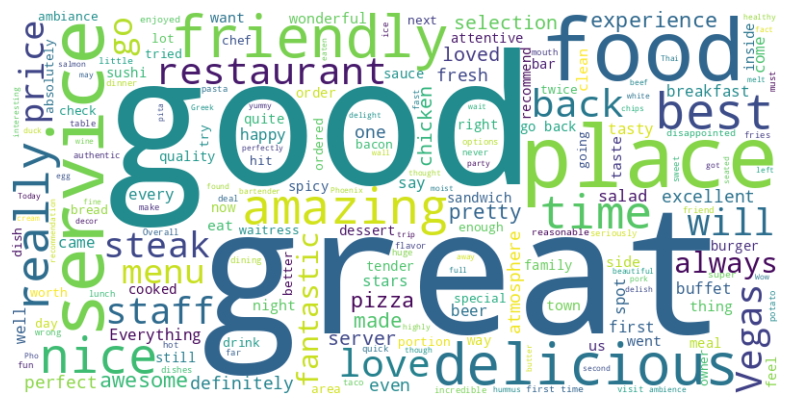

In [22]:
# import library
# positive review

from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud = df.loc[df['Liked'] == 1,:]
text = ' '.join([text for text in word_cloud['Review']])
# Generate a WordCloud object
wordcloud = WordCloud(width=800, height=400,background_color='white').generate(text)
# Display the word cloud using matplotlib
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

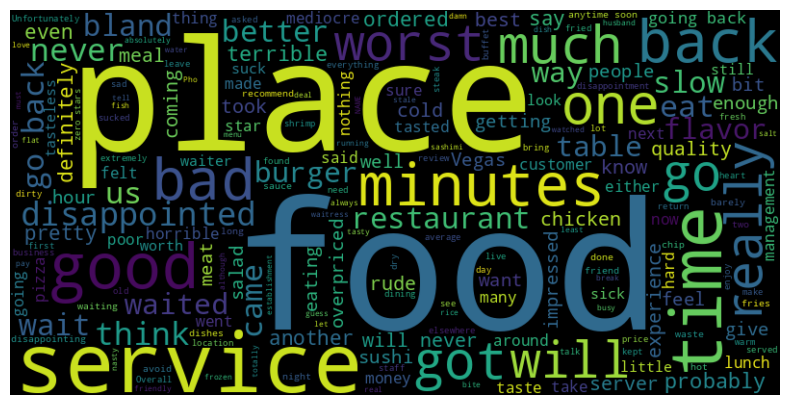

In [43]:
#Code Modification 1: Copy and paste the code from the previous cell.
#Change two parameters to change the Word Cloud to depict negative reviews with a background in some color of your choice, other than white.
#Include the Code and a snip or cut and paste of your output in the Assignment Responses document.
#Modify comments to reflect the new image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter negative reviews (assuming 'Liked' column has 0 for negative reviews)
negative_reviews = df[df['Liked'] == 0]['Review']

# Join all negative reviews into one large string for the Word Cloud
negative_text = ' '.join(negative_reviews)

# Generate the Word Cloud for negative reviews with a background color (e.g., 'black')
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()




In [24]:
# Creating a Bag of Words Model
# For more detail on Bag of Words: https://builtin.com/machine-learning/bag-of-words

# Import the CountVectorizer class from scikit-learn, which is used to convert text data into numerical features.
from sklearn.feature_extraction.text import CountVectorizer

# Initialize a CountVectorizer with a specified maximum number of features (max_features).
# The 'max_features' parameter controls the number of most frequent words to keep in the vocabulary.
# Adjust this value based on your specific requirements.
cv = CountVectorizer(max_features=1500)

# Apply the CountVectorizer to the 'corpus' to transform the text data into a numerical representation.
# The 'fit_transform' method converts the text into a sparse matrix where rows represent reviews and columns represent words.
X = cv.fit_transform(corpus).toarray()

# 'X' now contains the BoW representation of the text data.

# Extract the target variable 'y' from the DataFrame 'df'.
# Assuming the target variable is located in the second column (index 1) of the DataFrame.
y = df.iloc[:, 1].values

# 'y' now contains the labels or target values corresponding to each review.

# The resulting 'X' and 'y' can be used to train machine learning models for tasks such as sentiment analysis or text classification.


<h2><b>Data Splitting</b></h2>

In [25]:
# Splitting the Dataset into Training and Testing Sets

# Comment 12: In this code, we split the dataset into training and testing sets to <finish this sentence, what is the purpose of splitting the dataset into two sets?>

# Import the 'train_test_split' function from scikit-learn, which is used for splitting datasets.

########################################################################################

from sklearn.model_selection import train_test_split

# Split the feature matrix 'X' and the target variable 'y' into training and testing sets.
# The 'test_size' parameter specifies the proportion of the dataset to include in the test split.
# Here, 20% of the data is reserved for testing (test_size=0.20).
# The 'random_state' parameter ensures reproducibility by fixing the random seed for the split.
# This means that the same split will be obtained every time you run the code with the same random_state value.

############################################################################################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


###########################################################################

# 'X_train' and 'y_train' contain the features and labels for the training set, respectively.
# 'X_test' and 'y_test' contain the features and labels for the testing set, respectively.

# The dataset is typically divided into a training set (used to train the model) and a testing set (used to evaluate the model's performance).
# The proportions used in this split can be adjusted based on the specific requirements of your analysis.

# In this example, the dataset contains 1000 samples, and 80% (800 samples) are used for training,
# while 20% (200 samples) are used for testing. These proportions can be modified as needed.


In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

# **Model Training**

TEXT 4: This notebook runs several algorithms on the dataset.  In layman's terms, explain the difference between machine learning for classification vs machine learning for prediction.  Can both approaches be applied to this problem?  Or is this problem more suited to one approach?

machine learning for classification is about teaching a model to put things into categories or groups. For example, given a review, the model decides if it's "positive" or "negative," which are predefined categories. Classification answers the question: "What kind of thing is this?"

On the other hand, machine learning for prediction is about forecasting a specific value. For example, a model might predict a numerical value like the future price of a stock. Prediction answers the question: "What will happen next or what value will this take?"

In this problem, where the goal is to determine whether a review is "positive" or "negative," classification is more appropriate because we are assigning a label (positive or negative) to each review rather than predicting a continuous value. Therefore, this problem is suited for classification approaches, although prediction models are useful in other types of problems.

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier,
    AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier,
)
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.linear_model import (
    LogisticRegression, SGDClassifier, RidgeClassifier,
)
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
import numpy as np

# Define a dictionary of models with their names as keys and model instances as values
models = {
    'MultinomialNB': MultinomialNB(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'SVC': SVC(),
    'LinearSVC': LinearSVC(),
    'NuSVC': NuSVC(),
    'LogisticRegression': LogisticRegression(),
    'SGDClassifier': SGDClassifier(),
    'RidgeClassifier': RidgeClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),

}

# Create an empty dictionary to store model accuracies
# ... Your code up to the loop ...

# Create an empty dictionary to store model accuracies and their differences
model_accuracies = {}
model_accuracies_diff = {}

# Specify the number of folds (k)
num_folds = 11

# Initialize a KFold cross-validator
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Loop through each model and train/evaluate it with k-fold cross-validation
for model_name, model in models.items():
    train_accuracies = []
    test_accuracies = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

    # Calculate the average training and testing accuracy across all folds
    average_train_accuracy = np.mean(train_accuracies)
    average_test_accuracy = np.mean(test_accuracies)

    # Calculate the difference between training and testing accuracy
    accuracy_diff = abs(average_train_accuracy - average_test_accuracy)

    # Print training and testing accuracy for the model
    print(f"{model_name}: Training Accuracy={average_train_accuracy * 100:.2f}%, Testing Accuracy={average_test_accuracy * 100:.2f}%, Accuracy Difference={accuracy_diff * 100:.2f}%")
    print("="*149)

    # Store the average testing accuracy and the difference in accuracies in the model_accuracies and model_accuracies_diff dictionaries
    model_accuracies[model_name] = average_test_accuracy
    model_accuracies_diff[model_name] = accuracy_diff

# Sort the models based on the absolute difference between training and testing accuracy
sorted_models = sorted(model_accuracies_diff.items(), key=lambda x: x[1])
print()
# Print the best models in ascending order of accuracy difference
print("︻"*149)
print()
print("Best Models (Closest Training and Testing Accuracy):")
print()
print("︻"*149)
print()
for model_name, accuracy_diff in sorted_models:
    print(f"{model_name}: Accuracy Difference={accuracy_diff * 100:.2f}%")
    print("-"*100)

# Print the model with the smallest accuracy difference (best model)
best_model_name = sorted_models[0][0]
print(f"The Best Model is: {best_model_name}")

MultinomialNB: Training Accuracy=94.05%, Testing Accuracy=79.40%, Accuracy Difference=14.65%
RandomForestClassifier: Training Accuracy=99.53%, Testing Accuracy=80.20%, Accuracy Difference=19.33%
GradientBoostingClassifier: Training Accuracy=85.91%, Testing Accuracy=78.20%, Accuracy Difference=7.71%
AdaBoostClassifier: Training Accuracy=82.10%, Testing Accuracy=76.70%, Accuracy Difference=5.40%
BaggingClassifier: Training Accuracy=97.14%, Testing Accuracy=77.50%, Accuracy Difference=19.64%
ExtraTreesClassifier: Training Accuracy=99.53%, Testing Accuracy=79.50%, Accuracy Difference=20.03%
SVC: Training Accuracy=97.33%, Testing Accuracy=80.80%, Accuracy Difference=16.53%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning:

The default value of `dual` will change from `Tr

LinearSVC: Training Accuracy=99.05%, Testing Accuracy=80.00%, Accuracy Difference=19.05%
NuSVC: Training Accuracy=98.62%, Testing Accuracy=81.40%, Accuracy Difference=17.22%
LogisticRegression: Training Accuracy=96.62%, Testing Accuracy=80.40%, Accuracy Difference=16.22%
SGDClassifier: Training Accuracy=98.86%, Testing Accuracy=77.10%, Accuracy Difference=21.76%
RidgeClassifier: Training Accuracy=98.65%, Testing Accuracy=78.11%, Accuracy Difference=20.54%
DecisionTreeClassifier: Training Accuracy=99.53%, Testing Accuracy=77.50%, Accuracy Difference=22.03%

︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻

Best Models (Closest Training and Testing Accuracy):

︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻︻

AdaBoostClassifier: Accuracy Difference=5.40%
-----------------------------------

TEXT 5: Your non-data scientist boss (or client) asks you "What's the difference between training accuracy and testing accuracy and what's the significance of the 'Accuracy Difference'?  Why don't we just choose the highest training accuracy?" Please respond to the two/three questions in layman's terms, but be aware that you must provide some background otherwise the specific answers to the questions may not suffice.  Begin by explaining the machine learning notion of training data vs testing data. Additional hint: at some point you should mention (and define) 'overfitting', how it is caused, how these metrics might help identify it and why overfitting should be avoided.

In machine learning, we split our data into two parts: training data and testing data. The training data is used to teach the model—this is where the model learns patterns and relationships from the data. The testing data, on the other hand, is used to check how well the model can perform on new, unseen data. Think of it like studying for a test: the training data is your study material, and the testing data is the actual exam.

Training accuracy is how well the model performs on the data it was trained on, while testing accuracy shows how well the model performs on data it hasn't seen before. The accuracy difference is the gap between these two numbers, and it helps us understand if the model has learned to generalize well or if it's suffering from overfitting.

Overfitting happens when a model performs really well on the training data (memorizing it perfectly) but does poorly on new data (testing data). This means the model has learned the specific details and noise in the training data, rather than understanding the underlying patterns. A high training accuracy but low testing accuracy is a sign of overfitting. We want to avoid overfitting because it means the model won't work well in the real world, where it will encounter new data. This is why we don't just choose the model with the highest training accuracy—what matters is how well the model generalizes to new data, and this is reflected in the testing accuracy and the accuracy difference.










In [28]:
# Predicting the Test set results

y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0])

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
import numpy as np

# Load your data (X and y) here

# Create an AdaBoostClassifier instance
ada_boost_classifier = AdaBoostClassifier()

# Specify the number of folds (k)
num_folds = 11

# Initialize a KFold cross-validator
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store metrics for each fold
train_accuracies = []
test_accuracies = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []
classification_reports = []

# Loop through each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the AdaBoostClassifier on the training data
    ada_boost_classifier.fit(X_train, y_train)

    # Make predictions on the training data
    y_train_pred = ada_boost_classifier.predict(X_train)

    # Calculate training accuracy for the fold
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    # Make predictions on the testing data
    y_test_pred = ada_boost_classifier.predict(X_test)

    # Calculate testing accuracy for the fold
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

    # Calculate precision, recall, and F1-score for the fold
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Calculate and store the confusion matrix for the fold
    confusion = confusion_matrix(y_test, y_test_pred)
    confusion_matrices.append(confusion)

    # Generate and store the classification report for the fold
    classification = classification_report(y_test, y_test_pred)
    classification_reports.append(classification)

# Calculate the average training and testing accuracies
average_train_accuracy = np.mean(train_accuracies)
average_test_accuracy = np.mean(test_accuracies)
average_accuracy_difference = np.mean(train_accuracy - test_accuracies)
# Calculate the average precision, recall, and F1-score
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)
average_f1 = np.mean(f1_scores)

# Print the results
print("AdaBoostClassifier Results:")
print("-"*150)
print(f"Average Training Accuracy: {average_train_accuracy * 100:.2f}%")
print("-"*150)
print(f"Average Testing Accuracy: {average_test_accuracy * 100:.2f}%")
print("-"*150)
print(f"Average Accuracies Difference: {average_accuracy_difference * 100:.2f}%")
print("-"*150)
print(f"Average Precision: {average_precision:.2f}")
print("-"*150)
print(f"Average Recall: {average_recall:.2f}")
print("-"*150)
print(f"Average F1-score: {average_f1:.2f}")
print("-"*150)

AdaBoostClassifier Results:
------------------------------------------------------------------------------------------------------------------------------------------------------
Average Training Accuracy: 82.15%
------------------------------------------------------------------------------------------------------------------------------------------------------
Average Testing Accuracy: 76.60%
------------------------------------------------------------------------------------------------------------------------------------------------------
Average Accuracies Difference: 5.93%
------------------------------------------------------------------------------------------------------------------------------------------------------
Average Precision: 0.88
------------------------------------------------------------------------------------------------------------------------------------------------------
Average Recall: 0.61
--------------------------------------------------------------------

In [30]:
# Calculate and store the confusion matrix for the fold
confusion = confusion_matrix(y_test, y_test_pred)
confusion_matrices.append(confusion)

# Print the confusion matrix for the current fold
print(f"Confusion Matrix - Fold {len(confusion_matrices)}:\n{confusion}")


Confusion Matrix - Fold 12:
[[40  2]
 [23 25]]


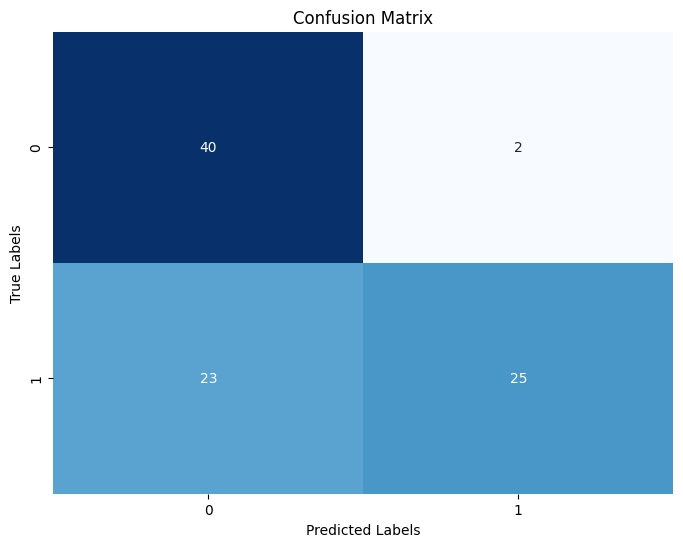

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


TEXT 6: In layman's terms, explain the significance of each cell of the Confusion Matrix.  HINT: Your explanation should detail the results within the context of 'true' and 'predicted' axes and labels.

A Confusion Matrix is a simple way to understand how well a machine learning model is performing by comparing the true labels (what things actually are) with the predicted labels (what the model thinks they are). It is especially useful for classification problems, where we're trying to assign data to categories like "positive" or "negative."

The Confusion Matrix is typically a 2x2 grid for binary classification (like positive/negative), and each cell represents a different type of result:

True Positive (TP): The model correctly predicted positive when it actually was positive. This is a successful prediction.

True Negative (TN): The model correctly predicted negative when it actually was negative. Another successful prediction.

False Positive (FP): The model predicted positive, but the actual label was negative. This is an error, often called a Type I error or a "false alarm."

False Negative (FN): The model predicted negative, but the actual label was positive. This is also an error, known as a Type II error, where something positive was missed.

In [32]:
# Generate and store the classification report for the fold
classification = classification_report(y_test, y_test_pred)
classification_reports.append(classification)

# Print the classification report for the current fold
print(f"Classification Report - Fold {len(classification_reports)}:\n{classification}")


Classification Report - Fold 12:
              precision    recall  f1-score   support

           0       0.63      0.95      0.76        42
           1       0.93      0.52      0.67        48

    accuracy                           0.72        90
   macro avg       0.78      0.74      0.71        90
weighted avg       0.79      0.72      0.71        90



<h2><b>HyperParameterTune the NaiveBayesClassifier</b></h2>

<h2>Using Stratified Kfold</h2>

AdaBoostClassifier Results with Stratified k-fold Cross-Validation:
Average Training Accuracy: 82.27%
Average Testing Accuracy: 76.40%
Average Accuracy Difference: 4.10%


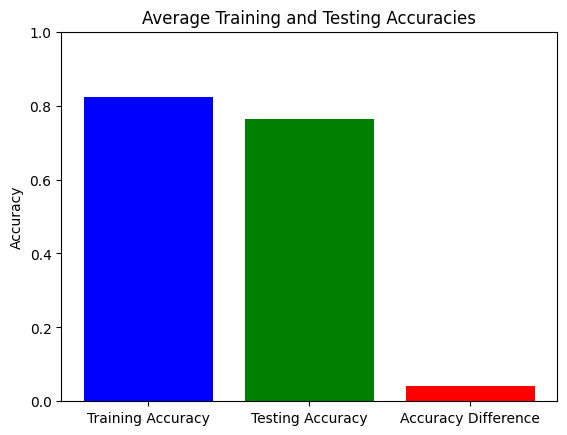

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Load your data (X and y) here

# Create an AdaBoostClassifier instance
ada_boost_classifier = AdaBoostClassifier()

# Specify the number of folds (k) and use StratifiedKFold
num_folds = 5
stratified_kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store metrics for each fold
train_accuracies = []
test_accuracies = []

# Loop through each fold
for train_index, test_index in stratified_kf.split(X, y):  # Notice the addition of 'y'
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the AdaBoostClassifier on the training data
    ada_boost_classifier.fit(X_train, y_train)

    # Make predictions on the training data
    y_train_pred = ada_boost_classifier.predict(X_train)

    # Calculate training accuracy for the fold
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    # Make predictions on the testing data
    y_test_pred = ada_boost_classifier.predict(X_test)

    # Calculate testing accuracy for the fold
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

# Calculate the average training and testing accuracies
average_train_accuracy = np.mean(train_accuracies)
average_test_accuracy = np.mean(test_accuracies)
average_accuracy_difference = np.mean(train_accuracy - test_accuracies)
# Print the results
print("AdaBoostClassifier Results with Stratified k-fold Cross-Validation:")
print("="*149)
print(f"Average Training Accuracy: {average_train_accuracy * 100:.2f}%")
print("="*149)
print(f"Average Testing Accuracy: {average_test_accuracy * 100:.2f}%")
print("="*149)
print(f"Average Accuracy Difference: {average_accuracy_difference * 100:.2f}%")
print("="*149)

import matplotlib.pyplot as plt

# Create a bar plot
categories = ['Training Accuracy', 'Testing Accuracy', 'Accuracy Difference']
values = [average_train_accuracy, average_test_accuracy, average_accuracy_difference]
plt.bar(categories, values, color=['blue', 'green', 'red'])
plt.ylabel('Accuracy')
plt.title('Average Training and Testing Accuracies')
plt.ylim(0, 1.0)  # Set the y-axis limits between 0 and 1
plt.show()


# **Predictions**

In [34]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

def predict_sentiment(sample_review, ada_boost_classifier, cv):
    # Preprocess the sample review
    sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)

    # Transform the preprocessed review using the CountVectorizer (cv)
    temp = cv.transform([final_review]).toarray()

    # Use the pre-trained classifier to predict sentiment
    sentiment = ada_boost_classifier.predict(temp)

    return sentiment[0]  # Return the predicted sentiment (assuming it's a single value)


In [35]:
# Sample reviews as strings
reviews = [
    'The food is really bad.',
    'I love their delicious dishes!',
    'Terrible experience. Avoid this place.',
    'The service was excellent.',
    'Worst place ever, but nice food'
]

for review in reviews:
    sentiment = predict_sentiment(review, ada_boost_classifier, cv)
    if sentiment:
        sentiment_label = 'POSITIVE'
    else:
        sentiment_label = 'NEGATIVE'

    print(f"Review: '{review}'")
    print(f"Sentiment: {sentiment_label}")
    print()


Review: 'The food is really bad.'
Sentiment: NEGATIVE

Review: 'I love their delicious dishes!'
Sentiment: POSITIVE

Review: 'Terrible experience. Avoid this place.'
Sentiment: NEGATIVE

Review: 'The service was excellent.'
Sentiment: POSITIVE

Review: 'Worst place ever, but nice food'
Sentiment: NEGATIVE



# Overall Accuracy

AdaBoostClassifier Results with Stratified k-fold Cross-Validation:
Average Training Accuracy: 82.27%
Average Testing Accuracy: 76.40%
Average Accuracy Difference: 4.10%


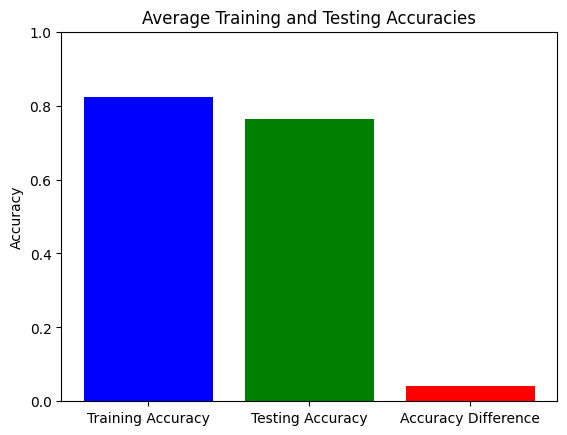

In [36]:
print("AdaBoostClassifier Results with Stratified k-fold Cross-Validation:")
print("="*149)
print(f"Average Training Accuracy: {average_train_accuracy * 100:.2f}%")
print("="*149)
print(f"Average Testing Accuracy: {average_test_accuracy * 100:.2f}%")
print("="*149)
print(f"Average Accuracy Difference: {average_accuracy_difference * 100:.2f}%")
print("="*149)



# Create a bar plot
categories = ['Training Accuracy', 'Testing Accuracy', 'Accuracy Difference']
values = [average_train_accuracy, average_test_accuracy, average_accuracy_difference]
plt.bar(categories, values, color=['blue', 'green', 'red'])
plt.ylabel('Accuracy')
plt.title('Average Training and Testing Accuracies')
plt.ylim(0, 1.0)  # Set the y-axis limits between 0 and 1
plt.show()

#Sentiment Analysis with VADER (Valence Aware Dictionary and sEntiment Reasoner)

**VADER** is a pre-built sentiment analysis tool commonly used (NLP). It is designed to analyze text data and determine the sentiment polarity of the text, i.e., whether the text expresses positive, negative, or neutral sentiment.

**VADER** is particularly useful for sentiment analysis of social media text, short texts, and informal language, as it is specifically tuned for such contexts.

**Compound Score :** VADER provides a compound score that represents the overall sentiment of the text, taking into account both positive and negative language. The compound score can help in quantifying sentiment intensity.

For more information on VADER:

*   https://www.codeproject.com/Articles/5269445/Using-Pre-trained-VADER-Models-for-NLTK-Sentiment
*   https://www.codeproject.com/Articles/5269447/Pros-and-Cons-of-NLTK-Sentiment-Analysis-with-VADE





In [37]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer


vader = SentimentIntensityAnalyzer()

def sent_analysis(corpus):
    '''
    input : The text
    output : The sentiment of the text
    '''
    sentiment = vader.polarity_scores(corpus)
    compound_score = sentiment['compound']

    if compound_score > 0 :
        return 1
    else:
        return 0


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [38]:
df['vader_sent'] = df['Review'].apply(lambda x : sent_analysis(x))


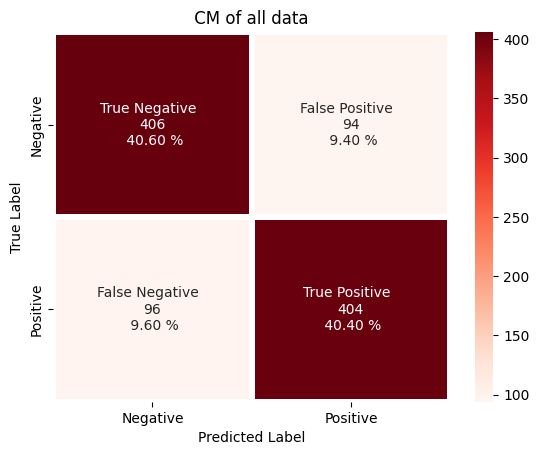

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


cm_names = ['True Negative' ,'False Positive','False Negative' ,'True Positive']
cm=confusion_matrix(df['Liked'],df['vader_sent'])
value_count = [ value  for value in cm.flatten()]
presentage = [value for value in  cm.flatten()/ np.sum(cm)  ]
all_labels = [f'{v1}  \n{v2}\n {v3*100:.2f} %' for v1 ,v2 ,v3 in zip(cm_names ,value_count,presentage )]
all_labels = np.asarray(all_labels).reshape(2,2)
sns.heatmap(cm,annot=all_labels,cmap='Reds',
                linewidth=3,fmt='',
                xticklabels=['Negative','Positive'],
                yticklabels=['Negative','Positive']
               )


plt.title(' CM of all data ')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

TEXT 7: a) Offer any final comments on the Predictions, Overall Accuracy and CM of the final models. b) What was the purpose of introducing 'sample reviews as strings'?  Were the results as you expected?  c) Any observations regarding the VADER model?

a) Final Comments on Predictions, Overall Accuracy, and Confusion Matrix (CM): The final models provide insight into how well the machine learning algorithms can classify sentiment (positive or negative). The Overall Accuracy reflects the percentage of correct predictions the model made, but it is important to also look at the Confusion Matrix. While a high accuracy is desirable, the CM can show if the model is making specific types of mistakes, such as predicting too many false positives or false negatives. This detailed breakdown helps ensure the model is balanced and not biased towards one category.

b) Purpose of Introducing 'Sample Reviews as Strings': The purpose of introducing sample reviews as strings was to test how well the models perform on real-world examples and to see if the predictions align with the expected sentiment based on human interpretation. By using actual reviews, we can better gauge if the model's output makes sense in context. The results could be as expected or surprising, depending on how well the model handles subtle nuances like sarcasm, tone, or negations (e.g., "not bad").

c) Observations Regarding the VADER Model: The VADER (Valence Aware Dictionary and sEntiment Reasoner) model is specifically designed for sentiment analysis and often performs well on social media and short text with clear sentiment. One observation could be that VADER, being rule-based, might capture sentiment well in certain cases, especially where punctuation or word emphasis matters (like "great!!!"). However, it may struggle with more complex linguistic structures or context, making it less flexible than machine learning models trained on large datasets.







